In [1]:
import os
import glob
import cv
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
import numpy as np
import random

from PIL import Image

#Load Kaggle Dataset
classes = ['mask', 'no_mask']

batch_size = 32
epochs = 10

In [2]:
def read_img(file):
    img = tf.io.read_file(file)
    img = tf.image.decode_image(img, channels=3)
    img.set_shape([None,None,3])
    img = tf.image.resize(img, [64, 64])
    img = img/127.5-1
    return img

def load_set(path):
    mask_path = path + '/WithMask' + '/*.png'
    no_mask_path = path + '/WithoutMask' + '/*.png'
    img_list = []
    label_list = []
    for filename in glob.glob(mask_path): 
        img_list.append(read_img(filename))
    label_list += [0] * len(img_list)
    masked_len = len(img_list)
    
    for filename in glob.glob(no_mask_path):
        img_list.append(read_img(filename))
    label_list += [1] * (len(img_list) - masked_len)

    #shuffle
    temp = list(zip(img_list, label_list)) 
    random.shuffle(temp) 
    img_list, label_list = zip(*temp) 
    
    return list(img_list), list(label_list)

 
    
[training_img, training_labels] = load_set('../kaggle_12k/Train')
[validation_img, validation_labels] = load_set('../kaggle_12k/Validation')
[test_img, test_labels] = load_set('../kaggle_12k/Test')
    

In [3]:
#From Tanya
def data_generator(features,labels):
  dataset = tf.data.Dataset.from_tensor_slices((features,labels))
  dataset = dataset.shuffle(buffer_size=100)
  autotune = tf.data.experimental.AUTOTUNE
  #dataset = dataset.map(load_data, num_parallel_calls=autotune)
  dataset = dataset.batch(batch_size=batch_size)
  dataset = dataset.repeat()
  dataset = dataset.prefetch(autotune)
  return dataset

In [4]:
train_dataset = data_generator(training_img, training_labels)


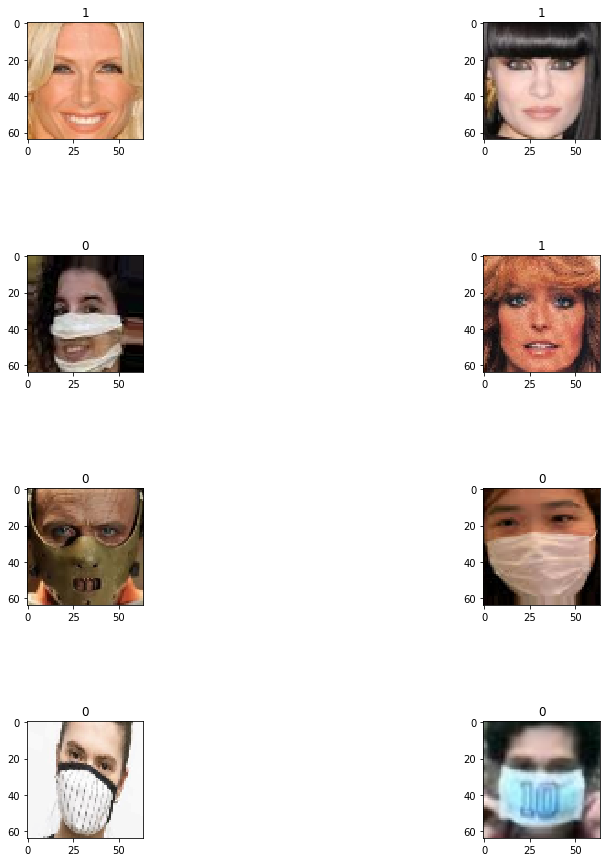

In [5]:
#Also Tanya
def show_img(dataset):
  plt.figure(figsize=(15,15))
  for i in range(8):
    for val in dataset.take(1):
      img  = (val[0][i]+1)*127.5
      plt.subplot(4,2,i+1)
      plt.imshow(tf.cast(img,tf.uint8))
      plt.title(val[1][i].numpy())
      plt.subplots_adjust(hspace=1)
  plt.show()

show_img(train_dataset)